In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from astropy.time import Time
from astropy.table import Table
from style import output_folder, big_fontsize, base_width, base_height, dpi
import seaborn as sns
import json
from astropy.time import Time
from scipy.interpolate import interp1d
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u

In [6]:
obs = pd.read_csv("data/nu_alerts_observed.csv", skiprows=[0, 1, 2])

obs = obs[~np.isnan(obs["RA"])]

In [7]:
lim_mag = 19.5

In [8]:
p_spatial = 0.9 * (obs["Observed area (corrected for chip gaps)"]/obs['Area (rectangle)'])

s = np.array(obs["Signalness"])
s[np.isnan(s)] = 0.5

p_det = np.array(p_spatial * s).reshape(len(s), 1)

def p_no(f):
    
    p_no_i = np.ones_like(f) - p_det*f
        
    p_no_all = np.ones_like(f)
    for x in p_no_i:
        p_no_all *= x.T
    return p_no_all

x = np.linspace(0., 1., 101)
y = p_no(x)

# from scipy.interpolate import interp1d

f = interp1d(y, x)

cl = 0.9

ul = f(1.-cl)

print(f"No more than {ul*100.:.1f}% (90% CL) of neutrino sources can have a magnitude greater than our limiting magnitude of {lim_mag:.1f}")

No more than 26.2% (90% CL) of neutrino sources can have a magnitude greater than our limiting magnitude of 19.5


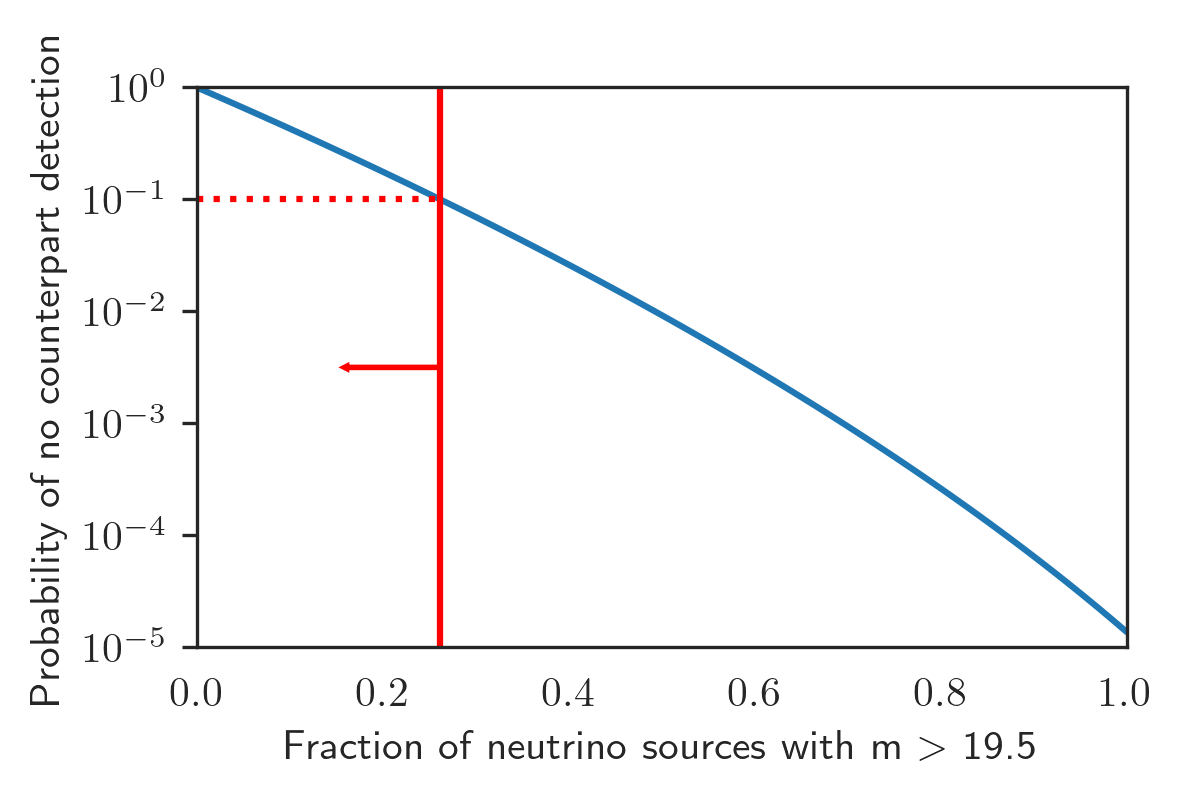

In [9]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)

ax = plt.subplot(111)

plt.plot(x, y)
plt.axvline(ul, color="r")
plt.plot([0.0, ul], [1.-cl, 1.-cl], color='r', linestyle=":")
plt.xlim(0.0, 1.0)
plt.yscale("log")

yticks = np.logspace(-5, 0, 6)

plt.ylim(yticks[0], yticks[-1])
plt.yticks(yticks)

plt.tick_params(axis='both', which='major', labelsize=big_fontsize)

plt.xlabel(f"Fraction of neutrino sources with m $>$ {lim_mag:.1f}", fontsize=big_fontsize)
plt.ylabel("Probability of no counterpart detection", fontsize=big_fontsize)

ax2 = ax.twinx()

w = 0.3

plt.arrow(ul, 0.5, -0.1, 0.0, color="r")
plt.ylim(0.0 + w, 1.0 - w)
ax2.set_axis_off()

filename = "limit_app_mag.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [10]:
def M(z):
    
    dl = cosmo.luminosity_distance(z=z).to(u.pc)
    
    ab_mag = lim_mag - 5. * np.log10(dl/(10.*u.pc))
    
    return ab_mag
    
    